# TC1002S Herramientas computacionales: el arte de la analítica

This is a notebook with all your work for the final evidence of this course


# Niveles de dominio a demostrar con la evidencia

### SING0202A

Interpreta interacciones entre variables relevantes en un problema, como base para la construcción de modelos bivariados basados en datos de un fenómeno investigado que le permita reproducir la respuesta del mismo. Es capaz de construir modelos bivariados que expliquen el comportamiento de un fenómeno.


# Student information

- Name: Andrea Alejandra Espindola Gomez

- ID: A01639288

- My carreer: ITC


# Importing libraries

In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns    

from sklearn.cluster import KMeans

# PART 1
# Use your assigned dataset

## A1 Load data

In [4]:
# Define where you are running the code: colab or local
RunInColab          = True     # (False: no  | True: yes)

# If running in colab:
if RunInColab:
    # Mount your google drive in google colab
    from google.colab import drive
    drive.mount('/content/drive')

    # Find location
    #!pwd
    #!ls
    #!ls "/content/drive/My Drive/Colab Notebooks/MachineLearningWithPython/"

    # Define path del proyecto
    Ruta            = "/content/drive/My Drive/Colab Notebooks/"

else:
    # Define path del proyecto
    Ruta    = ""


Mounted at /content/drive


## A2 Data managment


In [5]:
# Dataset url
url = Ruta + "datasets/evidencia/A01639288.csv"

# Load the dataset
df = pd.read_csv(url)

Print the first 7 rows

In [58]:
df.head(7)

,Unnamed: 0,x1,x2
0,0,-0.938024,-0.187126
1,1,-0.801406,-0.586437
2,2,0.240521,0.911565
3,3,0.688388,0.216454
4,4,-1.065733,0.233441
5,5,-0.617512,0.717116
6,6,0.969244,-0.198061


Print the first 4 last rows

In [59]:
df.tail(4)

,Unnamed: 0,x1,x2
1096,1096,-0.568360,0.900671
1097,1097,0.093871,-0.553364
1098,1098,0.888226,-0.419151
1099,1099,0.837359,0.579126


How many rows and columns are in your data?

Use the `shape` method


In [60]:
df.shape

(1100, 3)

Print the name of all columns 

Use the `columns` method

In [61]:
df.columns

Index(['Unnamed: 0', 'x1', 'x2'], dtype='object')

What is the data type in each column

Use the `dtypes` method 

In [8]:
df.dtypes

Unnamed: 0      int64
x1            float64
x2            float64
dtype: object

What is the meaning of rows and columns?

In [ ]:
# Your responses here

#Todo valor que tenemos en nuestra df pertenece a una variable y a una observacion. 
#Las columnas representadas por variables son valores de medicion que describen atributos de nuestros datos
#Las filas representadas por observaciones son los datos derivados de un objeto

Print a statistical summary of your columns


In [9]:
df.describe()

,Unnamed: 0,x1,x2
count,1100.000000,1100.000000,1100.000000
mean,549.500000,-0.003156,-0.000803
std,317.686953,0.584564,0.583673
min,0.000000,-1.117985,-1.110575
25%,274.750000,-0.516936,-0.516496
50%,549.500000,0.002911,0.012244
75%,824.250000,0.509435,0.505726
max,1099.000000,1.065025,1.090271


In [ ]:
# 1) What is the minumum and maximum values of each variable
#The minimun for x1 is -1.117985 and the maximum 1.065025
#The minimun for x2 is -1.110575 and the maximum 1.090271

# 2) What is the mean and standar deviation of each variable
#The mean for x1 is -0.003156 and the standar deviation is 0.584564
#The mean for x2 is -0.000803 and the standar deviation is 0.583673

# 3) What the 25%, 50% and 75% represent?
#Estos datos son partidos en cuartiles y divide nuestros datos ordenados de menor a mayor en partes iguales. Se trata de 
#un indicador que nos ayuda a entender mejor nuestros datos.


Rename the columns using the same name with capital letters

In [22]:
df.rename(columns=str.upper)

,UNNAMED: 0,X1,X2
0,0,-0.938024,-0.187126
1,1,-0.801406,-0.586437
2,2,0.240521,0.911565
3,3,0.688388,0.216454
4,4,-1.065733,0.233441
...,...,...,...
1095,1095,0.132947,0.522709
1096,1096,-0.568360,0.900671
1097,1097,0.093871,-0.553364
1098,1098,0.888226,-0.419151


Rename the columns to their original names

In [23]:
df.rename(columns=str.lower)

,unnamed: 0,x1,x2
0,0,-0.938024,-0.187126
1,1,-0.801406,-0.586437
2,2,0.240521,0.911565
3,3,0.688388,0.216454
4,4,-1.065733,0.233441
...,...,...,...
1095,1095,0.132947,0.522709
1096,1096,-0.568360,0.900671
1097,1097,0.093871,-0.553364
1098,1098,0.888226,-0.419151


Use two different alternatives to get one of the columns

In [ ]:
#Forma1
df.loc[:5,["x1"]]

In [50]:
#Forma2
df['x1']

0      -0.938024
1      -0.801406
2       0.240521
3       0.688388
4      -1.065733
          ...   
1095    0.132947
1096   -0.568360
1097    0.093871
1098    0.888226
1099    0.837359
Name: x1, Length: 1100, dtype: float64

Get a slice of your data set: second and thrid columns and rows from 62 to 72

In [ ]:
df.loc[62:72,["x1","x2"]]

For the second and thrid columns, calculate the number of null and not null values and verify that their sum equals the total number of rows

In [39]:
df.isnull().sum()
df.shape

(1100, 3)

In [40]:
df.notnull().sum()
df.shape

(1100, 3)

Discard the last column


In [ ]:
#df.drop("x2", axis=1, inplace = True)


### Questions 

Based on the previos results, provide a description of yout dataset

Your response: En nuestros datos tenemos 1,100 observaciones y 2 variables. Tenemos datos de punto flotante. Analizando a simple vista los datos podemos observar que sus valores no difieren mucho. Sin embargo, al hacer una descripcion de df podemos ver que tiene un std en x1=0.584564 y x2=0.583673. Los valores de los cuartiles apenas y tienen una diferencia de milesimas. Esto nos dice que estas dos varibales se comportan muy parecidos.   




## A3 Data visualization

Plot in the same figure the histogram of the two variables

In [70]:
df.drop(df.columns[0], axis=1)

,x1,x2
0,-0.938024,-0.187126
1,-0.801406,-0.586437
2,0.240521,0.911565
3,0.688388,0.216454
4,-1.065733,0.233441
...,...,...
1095,0.132947,0.522709
1096,-0.568360,0.900671
1097,0.093871,-0.553364
1098,0.888226,-0.419151


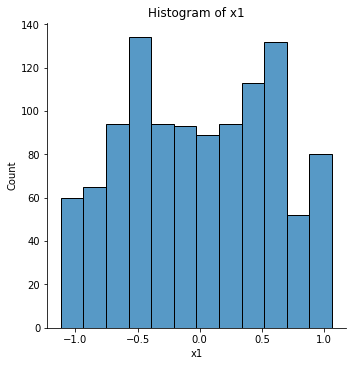

In [78]:
sns.displot(df["x1"], kde = False)
plt.ylabel("Count")
plt.title("Histogram of x1")
plt.show()

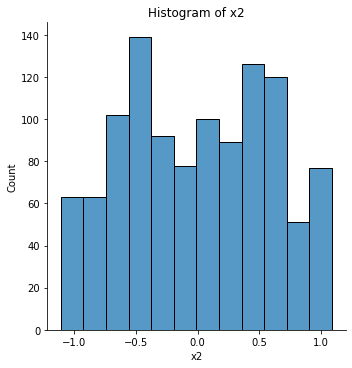

In [79]:
sns.displot(df["x2"], kde = False)
plt.ylabel("Count")
plt.title("Histogram of x2")
plt.show()

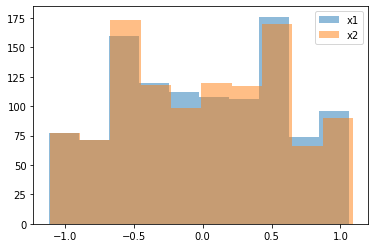

In [85]:
fig, ax = plt.subplots()
ax.hist(df['x1'], alpha=0.5, label='x1')
ax.hist(df['x2'], alpha=0.5, label='x2')
ax.legend(loc='upper right')
plt.show()

Based on this plots, provide a description of your data:

Your response here: En nuestra grafica y como habiamos intuido en la primera parte junto con la nuestra funcion de descripcion del df observamos que los valores se comportan muy parecidos. La ventaja es que aqui podemos ver mejor que tanta diferencia tiene cada uno.

Plot in the same figure the boxplot of the two variables 

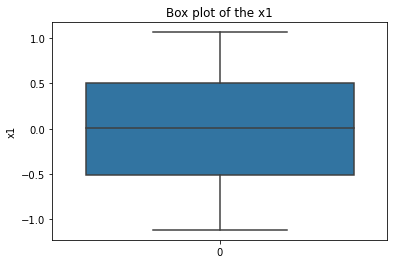

In [72]:
sns.boxplot(df["x1"]).set_title("Box plot of the x1")
plt.ylabel("x1")
plt.show()

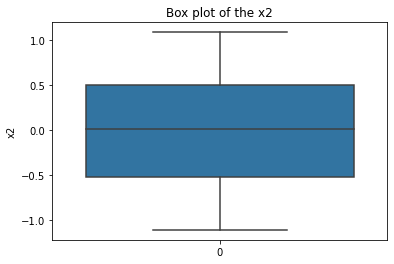

In [73]:
sns.boxplot(df["x2"]).set_title("Box plot of the x2")
plt.ylabel("x2")
plt.show()

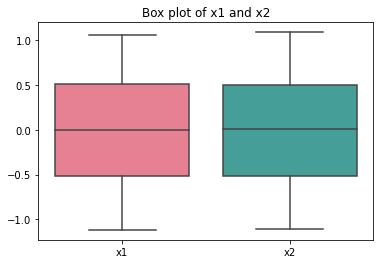

In [75]:
x = df.loc [:, ["x1", "x2"]]

x2bp = sns.boxplot(data=x, orient="v", palette="husl")
x2bp.set_title("Box plot of x1 and x2")
plt.show()

Scatter plot of the two variables

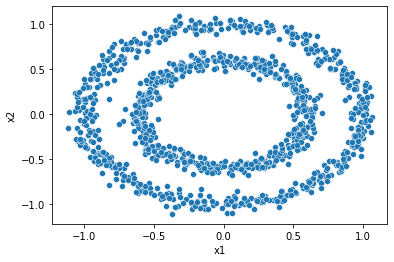

In [81]:
sns.scatterplot(data=df, x="x1", y="x2")
plt.show()

### Questions 

Based on the previos plots, provide a description of yout dataset

Your response: En nuestra grafica de dispersion podemos ver que los valores de x1 estan mas esparcido entre -1 y 1.0. Los valores de x2 se concentran mas en el centro entre -0.5 y 05. Pocos datos estan muy dispersos de los dos gupos que vemos.




## A4 Kmeans

Do Kmeans clustering assuming a number of clusters accorging to your scatter plot

In [88]:
K  = 2   

#Create/Initialize the KMeans box/object
km = KMeans(n_clusters=3, n_init="auto")

# Do K-means clustering (assing each point in the dataset to a cluster) 
#Ajustando y prediciento
#Nos da un array de 1024 datos
yestimated = km.fit_predict(df)

# Print estimated cluster of each point in the dataset
yestimated

array([1, 1, 1, ..., 0, 0, 0], dtype=int32)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


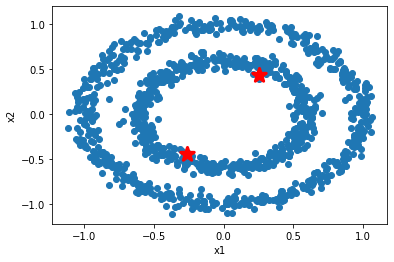

In [126]:
fig, ax = plt.subplots()
ax.scatter(df['x1'], df['x2'])
ax.set_xlabel('x1')
ax.set_ylabel('x2')
kmeans = KMeans(n_clusters=2)
kmeans.fit(df[['x1', 'x2']])
labels = kmeans.predict(df[['x1', 'x2']])
centroids = kmeans.cluster_centers_
ax.scatter(centroids[:, 0], centroids[:, 1], marker='*', s=200, linewidths=3, color='r')

plt.show()

Add to your dataset a column with the assigned cluster to each data point

In [100]:
df['yestimated'] = yestimated
df

,Unnamed: 0,x1,x2,yestimated
0,0,-0.938024,-0.187126,1
1,1,-0.801406,-0.586437,1
2,2,0.240521,0.911565,1
3,3,0.688388,0.216454,1
4,4,-1.065733,0.233441,1
...,...,...,...,...
1095,1095,0.132947,0.522709,0
1096,1096,-0.568360,0.900671,0
1097,1097,0.093871,-0.553364,0
1098,1098,0.888226,-0.419151,0


Print the number associated to each cluster

In [105]:
df['Cluster'].value_counts()

1    551
0    549
Name: Cluster, dtype: int64

Print the centroids

In [106]:
kmeans.cluster_centers_

array([[ 0.25768173,  0.43893113],
       [-0.26304647, -0.43894039]])

Print the intertia metric

In [107]:
kmeans.inertia_

463.4470414937356

Plot a scatter plot of your data assigned to each cluster. Also plot the centroids

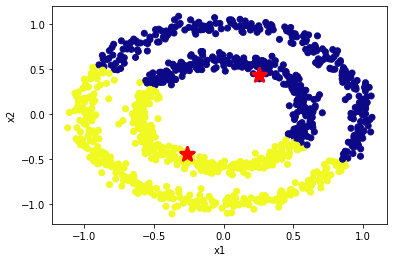

In [127]:
plt.scatter(df['x1'], df['x2'], c=df['Cluster'], cmap='plasma')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='*', s=200, linewidths=3, color='r')
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

### Questions 

Provides a detailed description of your results

Your response: En nuestra grafica podemos ver que se hicieron 2 grupos de datos. Por lo tanto tenemos 2 centroides que son puntos representativos de cada uno de nuestros cluster donde necesita pocas iteraciones para obtener la ubicacion de las coordenadas donde quedaran finalmente.

## A5 Elbow plot

Compute the Elbow plot

In [128]:
# Intialize a list to hold sum of squared error (sse)
sse=[]

# Define values of k
k_rng = range(1,10)

# For each k
for k in k_rng:
  #Create model
  km=KMeans(n_clusters=k, n_init="auto")
  #Do K-means clustering 
  km.fit_predict(df[['x1','x2']])
  #Save sse for each k
  sse.append(km.inertia_)

Text(0, 0.5, 'Sum of squared error')

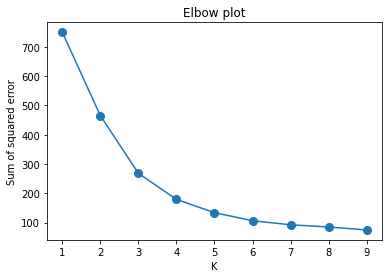

In [129]:
# Plot sse versus k
plt.plot(k_rng, sse, 'o-', markersize=8)

plt.title('Elbow plot')
plt.xlabel('K')
plt.ylabel('Sum of squared error')

### Questions 

What is the best number of clusters K? (argue your response)

Your response: Gracias a la grafica de Metodo de Elbow podemos ver en la grafica que de los valores de k no hay mucha diferencia entre 6 y 7. Sin embargo de 7 a 8 hay una pendiente menos pronunciada. Asi que, el mejor valor para k es 7.


Does this number of clusters agree with your inital guess? (argue your response)

Your response: No, porque la diferencia entre 2 y 5, 6, 7, 8, 9 es muy grande



# PART 2
# Create a dataset and do clustering

1) Generate some data using the "make_blobs" function from "sklearn.datasets"

- The number of observations is equal to the three last digits in your ID (if this number is lower than 99, then multiply it by ten)

- 3 variables

- 4 clusters

- Standar deviation of each cluster of 1.5



In [ ]:
from sklearn.datasets import make_blobs
x, y = make_blobs(n_samples=288, n_features=3, centers=4, cluster_std=1.5, random_state=0)
x

2) Plot the scatter plot of your data using the real cluster labels

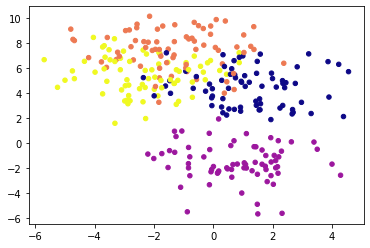

In [19]:
plt.scatter(x[:, 0], x[:, 1], c=y, s=20, cmap='plasma')

plt.show()

3) Do K means clustering 

In [20]:
km = KMeans(n_clusters=4, n_init="auto")
yestimated = km.fit_predict(x)
yestimated

array([0, 1, 0, 1, 1, 3, 3, 3, 2, 3, 3, 3, 0, 0, 1, 1, 3, 2, 3, 2, 0, 0,
       1, 0, 3, 0, 2, 3, 3, 0, 0, 2, 3, 1, 0, 3, 3, 1, 2, 2, 2, 2, 2, 3,
       0, 0, 1, 2, 0, 2, 1, 3, 3, 1, 0, 2, 2, 1, 3, 1, 2, 3, 2, 1, 3, 2,
       0, 2, 0, 0, 0, 3, 0, 0, 1, 3, 2, 3, 1, 1, 0, 1, 1, 2, 3, 3, 2, 1,
       2, 3, 0, 1, 1, 3, 2, 0, 0, 0, 2, 0, 1, 3, 0, 0, 3, 2, 1, 2, 3, 3,
       2, 1, 1, 2, 3, 2, 0, 2, 2, 2, 0, 0, 2, 1, 1, 2, 2, 3, 1, 0, 2, 2,
       3, 1, 0, 3, 2, 2, 3, 0, 0, 0, 3, 1, 0, 0, 3, 3, 1, 2, 1, 0, 0, 2,
       0, 1, 2, 1, 1, 1, 2, 1, 3, 3, 1, 2, 2, 1, 2, 3, 2, 0, 1, 0, 3, 1,
       3, 0, 3, 3, 3, 1, 1, 0, 2, 1, 3, 2, 2, 3, 2, 2, 0, 3, 0, 3, 0, 3,
       0, 0, 0, 2, 0, 2, 1, 2, 1, 1, 0, 1, 3, 2, 2, 3, 0, 0, 2, 2, 1, 2,
       0, 1, 1, 1, 2, 3, 0, 1, 3, 0, 1, 1, 2, 2, 3, 0, 0, 1, 1, 3, 1, 0,
       2, 1, 3, 0, 0, 0, 3, 3, 3, 3, 1, 3, 1, 0, 2, 1, 3, 1, 0, 2, 0, 2,
       3, 3, 2, 3, 0, 2, 1, 3, 2, 2, 0, 1, 2, 1, 0, 1, 1, 0, 2, 2, 3, 3,
       1, 2], dtype=int32)

4) Plot the scatter plot of your data using the estimated cluster labels

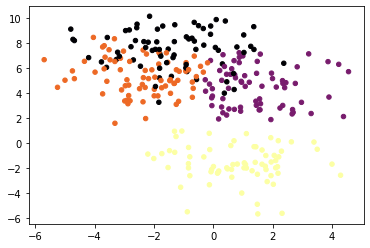

In [21]:
plt.scatter(x[:, 0], x[:, 1], c=yestimated, s=20, cmap='inferno')

plt.show()

### Questions 

Provides a detailed description of your results.

Your response:En nuestros resultados podemos ver que como en un principio definimos un k de 4, en la grafica obtuvimos nuestros datos agrupados en 4 parte.

# PART 3
# Descipcion de tu percepcion del nivel de desarrollo de la subcompetencia 

### SING0202A Interpretación de variables


Escribe tu description del nivel de logro del siguiente criterio de la subcompetencia

**Interpreta interacciones**. Interpreta interacciones entre variables relevantes en un problema, como base para la construcción de modelos bivariados basados en datos de un fenómeno investigado que le permita reproducir la respuesta del mismo.

Tu respuesta: A lo largo de la semana aprendi a manejar datos como tambien saber a modificarlos cuando se es necesario. Tambien a descarta variables o a convertirlas en valores cuantitativos es que se necesita para obtener una descripcion de datos para poder observar sus caracteristicas. Al final, supe como utilizar estas herramientas de programacions que hace la lectura de datos mucho mas rapida y eficiente

Escribe tu description del nivel de logro del siguiente criterio de la subcompetencia

**Construcción de modelos**. Es capaz de construir modelos bivariados que expliquen el comportamiento de un fenómeno.

Tu respuesta: Al analizar los datos que nos dan para manipularlos puedo diferenciar ciertos conceptos estadisticos basicos para saber que informacion nos sirve y que otra podemos descartarla sin que nuestro modelo se vea afectado, Como tambien aquellas variables que son dependientes o independientes de otras y observar su comportamiento con funciones computacionales que nos da descripciones rapidos para saber como se comportan los datos
